In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import missingno as msno
pd.set_option('display.max_columns', None)

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import *

Previsão concluída.
Accuratezza per ogni fold: [0.84544813 0.89830508 0.94279661 0.95621469 0.85310734]
Accuratezza minima: 84.5 Accuratezza massima: 95.6
Accuratezza media: 89.9
Deviazione standard dell'accuratezza: 4.5
[[1138   47]
 [  32  200]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1185
           1       0.81      0.86      0.84       232

    accuracy                           0.94      1417
   macro avg       0.89      0.91      0.90      1417
weighted avg       0.95      0.94      0.94      1417



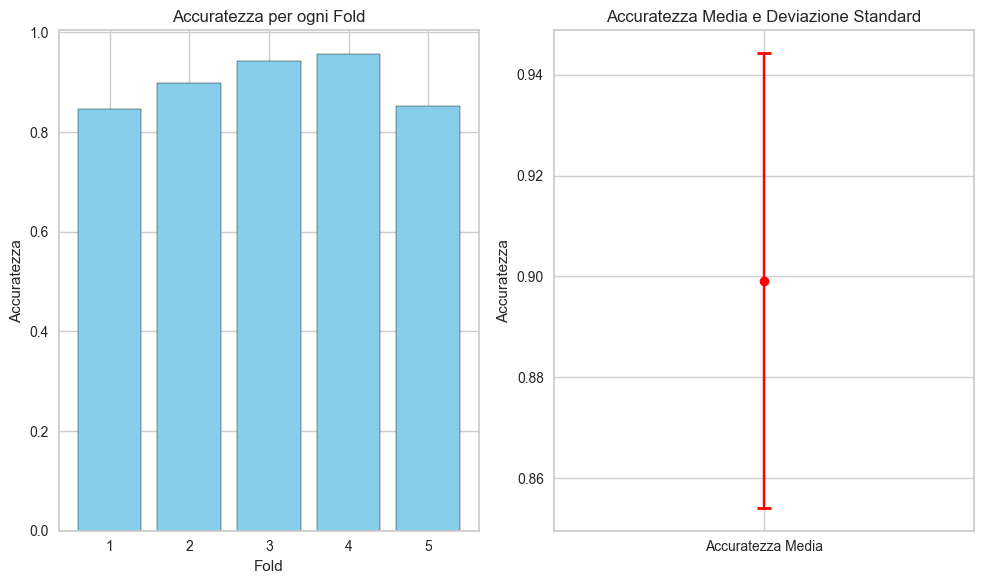

In [18]:
import contextlib
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

# Caricamento del dataset
df = pd.read_csv('../DataFrame_Crédito.csv').drop(columns=['Unnamed: 0', 'id'])
DF_ML = pd.get_dummies(df, drop_first=True)

# Separazione delle caratteristiche e della variabile target
y = DF_ML.default
X = DF_ML.drop(columns='default', axis=1)

# Suddivisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)                   
X_test = scaler.transform(X_test)

# Applicazione di SMOTE per il bilanciamento del dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Sostituzione di GradientBoostingClassifier con LGBMClassifier
clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, 
                         max_depth=3, random_state=42)

# Captura a saída da célula
output_buffer = io.StringIO()
with contextlib.redirect_stdout(output_buffer):
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)

# Agora você pode usar as variáveis criadas normalmente
print("Previsão concluída.")

# Mostra i risultati
print("Accuratezza per ogni fold:", scores)
print("Accuratezza minima:", round(min(scores) * 100, 1), "Accuratezza massima:", round(max(scores) * 100, 1))
print("Accuratezza media:", round(np.mean(scores * 100), 1))
print("Deviazione standard dell'accuratezza:", round(np.std(scores * 100), 1))

# Crea il grafico
mean_score = np.mean(scores)
std_score = np.std(scores)
plt.figure(figsize=(10, 6))

# Grafico a barre delle accuratezze per ogni fold
plt.subplot(1, 2, 1)
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuratezza')
plt.title('Accuratezza per ogni Fold')

# Grafico a dispersione dell'accuratezza media e deviazione standard
plt.subplot(1, 2, 2)
plt.errorbar(x=1, y=mean_score, yerr=std_score, fmt='o', color='red', 
             capsize=5, capthick=2)
plt.xticks([1], ['Accuratezza Media'])
plt.ylabel('Accuratezza')
plt.title('Accuratezza Media e Deviazione Standard')

# Valutazione del modello
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.tight_layout()
plt.show()

Previsão concluída.
[LightGBM] [Info] Number of positive: 4783, number of negative: 4783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9344
[LightGBM] [Info] Number of data points in the train set: 9566, number of used features: 148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

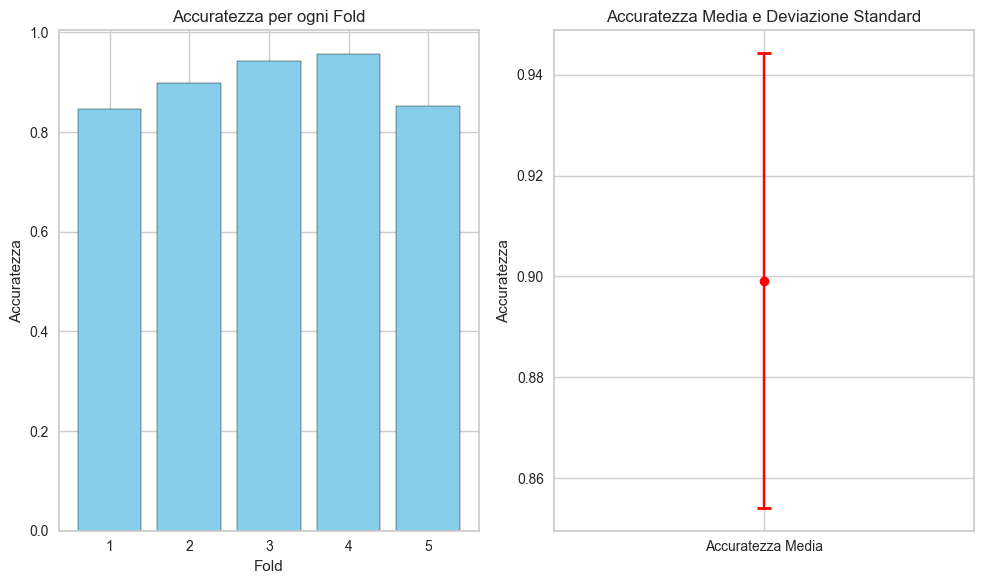

In [17]:
# Base Model
# Caricamento del dataset
df = pd.read_csv('../DataFrame_Crédito.csv').drop(columns=['Unnamed: 0', 'id'])
DF_ML = pd.get_dummies(df, drop_first=True)

# Separazione delle caratteristiche e della variabile target
y = DF_ML.default
X = DF_ML.drop(columns='default', axis=1)

# Suddivisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)                   
X_test = scaler.transform(X_test)

# Applicazione di SMOTE per il bilanciamento del dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Sostituzione di GradientBoostingClassifier con LGBMClassifier
clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, 
                         max_depth=3, random_state=42)
clf.fit(X_train_res, y_train_res)

# Previsioni sul test set
y_pred = clf.predict(X_test)

# Cross-Validation
scores = cross_val_score(clf, X, y, cv=5)

# Mostra i risultati
print("Accuratezza per ogni fold:", scores)
print("Accuratezza minima:", round(min(scores) * 100, 1), "Accuratezza massima:", round(max(scores) * 100, 1))
print("Accuratezza media:", round(np.mean(scores * 100), 1))
print("Deviazione standard dell'accuratezza:", round(np.std(scores * 100), 1))

# Crea il grafico
mean_score = np.mean(scores)
std_score = np.std(scores)
plt.figure(figsize=(10, 6))

# Grafico a barre delle accuratezze per ogni fold
plt.subplot(1, 2, 1)
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuratezza')
plt.title('Accuratezza per ogni Fold')

# Grafico a dispersione dell'accuratezza media e deviazione standard
plt.subplot(1, 2, 2)
plt.errorbar(x=1, y=mean_score, yerr=std_score, fmt='o', color='red', 
             capsize=5, capthick=2)
plt.xticks([1], ['Accuratezza Media'])
plt.ylabel('Accuratezza')
plt.title('Accuratezza Media e Deviazione Standard')

# Valutazione del modello
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans

# Definir o número de clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Treinar o modelo de clustering
kmeans.fit(X)

# Adicionar a coluna de clusters ao dataset original
df['Cluster'] = kmeans.labels_

# Verificar a distribuição de 'default' por cluster
print(df.groupby('Cluster')['default'].mean())

Cluster
0    0.160923
1    0.138655
Name: default, dtype: float64


### Salvar modelo

In [4]:
"""import pickle
with open('LGBMClassifier.pkl', 'wb') as file:
    pickle.dump(clf, file)"""

"import pickle\nwith open('LGBMClassifier.pkl', 'wb') as file:\n    pickle.dump(clf, file)"

---

In [5]:
"""df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False)  # Remove thousand separators
df['limite_credito'] = df['limite_credito'].str.replace(',', '.', regex=False)  # Replace comma with period
df['limite_credito'] = df['limite_credito'].astype(float)

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False)  # Remove thousand separators
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace(',', '.', regex=False)  # Replace comma with period
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(float)"""

"df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False)  # Remove thousand separators\ndf['limite_credito'] = df['limite_credito'].str.replace(',', '.', regex=False)  # Replace comma with period\ndf['limite_credito'] = df['limite_credito'].astype(float)\n\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False)  # Remove thousand separators\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace(',', '.', regex=False)  # Replace comma with period\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(float)"

In [6]:
"""DF_ML = pd.get_dummies(df, drop_first=True)
DF_ML.head()"""

'DF_ML = pd.get_dummies(df, drop_first=True)\nDF_ML.head()'

In [7]:
"""# Configuração do ambiente do PyCaret
clf = setup(df, target='default', session_id=123, 
            preprocess=True, # Faz o pré-processamento automático
            remove_outliers=True, # Remove outliers
            normalize=True, # Normaliza os dados
            feature_selection=True, # Seleciona características
            pca=True) # Reduz dimensionalidade com PCA"""

"# Configuração do ambiente do PyCaret\nclf = setup(df, target='default', session_id=123, \n            preprocess=True, # Faz o pré-processamento automático\n            remove_outliers=True, # Remove outliers\n            normalize=True, # Normaliza os dados\n            feature_selection=True, # Seleciona características\n            pca=True) # Reduz dimensionalidade com PCA"

In [8]:
#best_model = compare_models()

In [9]:
#model = create_model('rf')

In [10]:
#evaluate_model(model)

In [11]:
"""print('vc - Curva de Variação do Modelo')
plot_model(model, plot='vc')

print('auc - Curva ROC (Receiver Operating Characteristic)')
plot_model(model, plot='auc')

print('pr - Curva de Precisão-Revocação (Precision-Recall)')
plot_model(model, plot='pr')

print('rfe - Eliminação Recursiva de Características (Recursive Feature Elimination)')
plot_model(model, plot='rfe')

print('manifold - Redução de Dimensionalidade')
plot_model(model, plot='manifold')

print('error - Erro de Predição')
plot_model(model, plot='error')

print('learning - Curva de Aprendizagem')
plot_model(model, plot='learning') 

print('feature - Importância das Características')
plot_model(model, plot='feature')"""

"print('vc - Curva de Variação do Modelo')\nplot_model(model, plot='vc')\n\nprint('auc - Curva ROC (Receiver Operating Characteristic)')\nplot_model(model, plot='auc')\n\nprint('pr - Curva de Precisão-Revocação (Precision-Recall)')\nplot_model(model, plot='pr')\n\nprint('rfe - Eliminação Recursiva de Características (Recursive Feature Elimination)')\nplot_model(model, plot='rfe')\n\nprint('manifold - Redução de Dimensionalidade')\nplot_model(model, plot='manifold')\n\nprint('error - Erro de Predição')\nplot_model(model, plot='error')\n\nprint('learning - Curva de Aprendizagem')\nplot_model(model, plot='learning') \n\nprint('feature - Importância das Características')\nplot_model(model, plot='feature')"

In [12]:
"""y = DF_ML.default
X = DF_ML.drop(columns='default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Creazione del modello Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento del modello
rf.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = rf.predict(X_test)"""

'y = DF_ML.default\nX = DF_ML.drop(columns=\'default\', axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n#print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")\n\nrus = RandomUnderSampler(random_state=42)\nX_train_res, y_train_res = rus.fit_resample(X_train, y_train)\n\n# Creazione del modello Random Forest\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\n\n# Addestramento del modello\nrf.fit(X_train, y_train)\n\n# Previsione sui dati di test\ny_pred = rf.predict(X_test)'

In [13]:
"""# Avaliação do modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))"""

'# Avaliação do modelo\nprint("Relatório de Classificação:\n", classification_report(y_test, y_pred))\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred))\nprint("\nAccuracy Score:")\nprint(accuracy_score(y_test, y_pred))'